# Predict TripAdvisor Rating

We should predict rating of restorants using all info available to compare it to their real rating to find possible cases of foul play.

# import

In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import datetime

%matplotlib inline

from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [4]:
RANDOM_SEED = 42

In [5]:
!pip freeze > requirements.txt

# DATA

In [7]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

## Basic information

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [26]:
# Combining two datasets for learning
df_train['sample'] = 1
df_test['sample'] = 0
df_test['Rating'] = 0

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Available features:
* City
* Cuisine Style
* Ranking (rank of the restaurant in it's city)
* Price Range
* Number of Reviews
* Reviews (two last reviews from the list)
* URL_TA: (page on 'www.tripadvisor.com') 
* ID_TA: Restaurant ID TripAdvisor data base
* Rating

In [45]:
data.sample(5)

,res_id,city,cuisine_style,ranking,price_range,num_of_reviews,reviews,url_ta,id_ta,sample,rating
10755,id_12495,Paris,NaN,12497.0,NaN,8.0,[['Quick meal- we should have selected somewh....,/Restaurant_Review-g187147-d10478105-Reviews-P...,d10478105,1,3.0
41829,id_297,London,"['Mediterranean', 'European', 'Middle Eastern'...",298.0,$$$$,2141.0,"[['Adore this place', 'Delicious, but would ha...",/Restaurant_Review-g186338-d2039000-Reviews-NO...,d2039000,1,4.5
23152,id_11921,London,"['British', 'Healthy', 'Fast Food', 'Vegetaria...",11931.0,$,17.0,"[['Fresh and fast!', ""Good food but they don't...",/Restaurant_Review-g186338-d733287-Reviews-Nuv...,d733287,1,4.5
46333,id_9790,London,"['Bar', 'British', 'Vegetarian Friendly']",9799.0,$$ - $$$,132.0,"[['Good pub grub, welcoming', 'Great first vis...",/Restaurant_Review-g186338-d2396955-Reviews-Th...,d2396955,1,4.0
26729,id_13584,London,NaN,13594.0,NaN,3.0,"[['A fun night out with friends, cheese and w....",/Restaurant_Review-g186338-d12652789-Reviews-T...,d12652789,1,3.5


In [46]:
# Renaming columns for convenience
data.columns = ['res_id', 'city', 'cuisine_style', 'ranking', 'price_range',
                'num_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'Rating']

# Cleaning and Prepping Data

## 1. Filling NAN 

In [30]:
# Creating column for all nan-values in 'Number of Reviews' column
data['num_of_reviews_isnan'] = pd.isna(data['num_of_reviews']).astype('uint8')

In [34]:
# Using mode to fill NaNs
data.num_of_reviews.mode()[0]

2.0

In [36]:
data.num_of_reviews.fillna(2, inplace=True)

In [ ]:
data.cuisine_style = data.cuisine_style.fillna("['Unknown']")

In [ ]:
data.cuisine_style = data.cuisine_style.apply(lambda x: x[1:-1].split(', '))

In [ ]:
data['p_range_is_nan'] = pd.isna(data['p_range']).astype('uint8')

In [ ]:
data['price_range'] = data['price_range'].fillna(data['price_range'].mode()[0])

In [68]:
data.reviews = data.reviews.fillna('[[, ], [, ]]')

### 2. Feature engineering

In [37]:
data.nunique(dropna=False)

res_id                  13094
city                       31
cuisine_style           10732
ranking                 12975
price_range                 4
num_of_reviews           1573
reviews                 41858
url_ta                  49963
id_ta                   49963
sample                      2
rating                     10
num_of_reviews_isnan        2
dtype: int64

## City

In [48]:
data.city.value_counts(dropna=False)

London        7193
Paris         6108
Madrid        3813
Barcelona     3395
Berlin        2705
Milan         2694
Rome          2589
Prague        1816
Lisbon        1647
Vienna        1443
Amsterdam     1372
Brussels      1314
Hamburg       1186
Munich        1145
Lyon          1126
Stockholm     1033
Budapest      1021
Warsaw         925
Dublin         836
Copenhagen     819
Athens         776
Edinburgh      745
Zurich         685
Oporto         642
Geneva         590
Krakow         554
Oslo           488
Helsinki       475
Bratislava     380
Luxembourg     263
Ljubljana      222
Name: city, dtype: int64

Categorical feature, creating dummies

In [38]:
data = pd.get_dummies(data, columns=[ 'city',], dummy_na=True)

In [40]:
data.sample(5)

,res_id,cuisine_style,ranking,price_range,num_of_reviews,reviews,url_ta,id_ta,sample,rating,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
3732,id_3732,NaN,929.0,NaN,37.0,[['Creative cocktails and amazing service - h....,/Restaurant_Review-g187265-d6821749-Reviews-Re...,d6821749,0,0.0,...,0,0,0,0,0,0,0,0,0,0
5739,id_5739,"['French', 'Bar', 'European']",6027.0,$$ - $$$,72.0,"[['Really Nice Lunch', 'Terrible'], ['09/15/20...",/Restaurant_Review-g187147-d5260023-Reviews-Br...,d5260023,0,0.0,...,0,0,1,0,0,0,0,0,0,0
36254,id_553,"['French', 'European', 'Vegetarian Friendly', ...",554.0,$$ - $$$,263.0,"[['Nice quiet lunch venue away', 'Recommended'...",/Restaurant_Review-g188590-d1111383-Reviews-Pr...,d1111383,1,4.0,...,0,0,0,0,0,0,0,0,0,0
6344,id_6344,"['Italian', 'Mediterranean', 'Pizza']",3885.0,$$ - $$$,49.0,"[[], []]",/Restaurant_Review-g187514-d8134857-Reviews-La...,d8134857,0,0.0,...,0,0,0,0,0,0,0,0,0,0
12627,id_1634,"['Italian', 'American', 'Gluten Free Options']",1640.0,$$ - $$$,149.0,"[['After cinema meal', 'Slow slow service at l...",/Restaurant_Review-g186525-d7270068-Reviews-Fr...,d7270068,1,3.0,...,0,0,0,0,0,0,0,0,0,0


## Price Range

In [42]:
data['price_range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: price_range, dtype: int64

Converting values to numbers

In [43]:
p_range = {'$': 1,'$$ - $$$': 2,'$$$$': 3}
data['price_range'] = data.price_range.map(p_range)

In [51]:
data['price_range'].value_counts(dropna=False)

$$ - $$$    23041
NaN         17361
$            7816
$$$$         1782
Name: price_range, dtype: int64

## Cuisine Style

In [53]:
data.cuisine_style.value_counts(dropna=False)

NaN                                                                                                              11590
['Italian']                                                                                                       1332
['French']                                                                                                        1019
['Spanish']                                                                                                        860
['French', 'European']                                                                                             503
                                                                                                                 ...  
['Asian', 'Thai', 'Japanese']                                                                                        1
['German', 'Bar', 'European', 'Pub', 'Central European', 'Hungarian']                                                1
['Indian', 'Asian', 'Thai', 'Bangladeshi']      

In [54]:
data.cuisine_style.explode()

0                                           ['Bar', 'Pub']
1        ['European', 'Scandinavian', 'Gluten Free Opti...
2                                  ['Vegetarian Friendly']
3        ['Italian', 'Mediterranean', 'European', 'Vege...
4        ['Italian', 'Mediterranean', 'European', 'Seaf...
                               ...                        
49995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
49996    ['French', 'American', 'Bar', 'European', 'Veg...
49997                                ['Japanese', 'Sushi']
49998    ['Polish', 'European', 'Eastern European', 'Ce...
49999                                          ['Spanish']
Name: cuisine_style, Length: 50000, dtype: object

Values look like lists, but actually they aren't

In [55]:
data.cuisine_style = data.cuisine_style.fillna("['Unknown']")

In [56]:
data.cuisine_style = data.cuisine_style.apply(lambda x: x[1:-1].split(', '))

In [57]:
data.cuisine_style

0                                           ['Bar', 'Pub']
1        ['European', 'Scandinavian', 'Gluten Free Opti...
2                                  ['Vegetarian Friendly']
3        ['Italian', 'Mediterranean', 'European', 'Vege...
4        ['Italian', 'Mediterranean', 'European', 'Seaf...
                               ...                        
49995    ['Italian', 'Vegetarian Friendly', 'Vegan Opti...
49996    ['French', 'American', 'Bar', 'European', 'Veg...
49997                                ['Japanese', 'Sushi']
49998    ['Polish', 'European', 'Eastern European', 'Ce...
49999                                          ['Spanish']
Name: cuisine_style, Length: 50000, dtype: object

Now values are lists

In [53]:
cuisine_df = data.explode('cuisine_style')

In [54]:
cuisine_df.cuisine_style.value_counts()

'Vegetarian Friendly'    14021
'European'               12561
'Unknown'                11590
'Mediterranean'           7820
'Italian'                 7433
                         ...  
'Polynesian'                 2
'Xinjiang'                   1
'Latvian'                    1
'Burmese'                    1
'Salvadoran'                 1
Name: cuisine_style, Length: 126, dtype: int64

Examining most popular styles. Many of the least popular could be discarded 

In [56]:
all_styles = cuisine_df.cuisine_style.value_counts().index
top_styles = list(all_styles)[:30]
styles_to_throw_away = list(set(all_styles) - set(top_styles))
cuisine_df.loc[cuisine_df.cuisine_style.isin(styles_to_throw_away), 
             'cuisine_style'] = "'Other'"

Replacing all styles aside from 30 most popular with 'Other'

In [58]:
s = cuisine_df.cuisine_style
s

0                        'Bar'
0                        'Pub'
1                   'European'
1                      'Other'
1        'Gluten Free Options'
                 ...          
49998               'European'
49998                  'Other'
49998       'Central European'
49998    'Vegetarian Friendly'
49999                'Spanish'
Name: cuisine_style, Length: 131266, dtype: object

In [59]:
cuisine_dummies = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)

In [60]:
data = pd.concat([data, cuisine_dummies], axis=1)

Creating dummies for these values and adding them to dataframe

In [62]:
data.sample(5)

,res_id,cuisine_style,ranking,price_range,num_of_reviews,reviews,url_ta,id_ta,sample,rating,...,'Portuguese','Pub','Seafood','Spanish','Sushi','Thai','Unknown','Vegan Options','Vegetarian Friendly','Wine Bar'
47395,id_2857,['Unknown'],2858.0,NaN,8.0,"[[""Fish was happy but I wasn't""], ['03/06/2017']]",/Restaurant_Review-g188644-d11667021-Reviews-H...,d11667021,1,2.5,...,0,0,0,0,0,0,1,0,0,0
9436,id_9436,['French'],3819.0,$,23.0,"[['A french option'], ['01/11/2017']]",/Restaurant_Review-g187147-d10434135-Reviews-L...,d10434135,0,0.0,...,0,0,0,0,0,0,0,0,0,0
46070,id_259,"['Healthy', 'Cafe', 'Soups', 'Vegetarian Frien...",260.0,$,51.0,"[['FRESH & PERFECT', 'Juice after race!!!'], [...",/Restaurant_Review-g189400-d8331796-Reviews-Fr...,d8331796,1,4.5,...,0,0,0,0,0,0,0,1,1,0
10030,id_1841,['Unknown'],1846.0,NaN,16.0,"[['Lack of communication', 'We Liked the Buffe...",/Restaurant_Review-g189541-d11841754-Reviews-C...,d11841754,1,3.0,...,0,0,0,0,0,0,1,0,0,0
32590,id_2159,['Unknown'],2163.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187331-d11955480-Reviews-S...,d11955480,1,4.0,...,0,0,0,0,0,0,1,0,0,0


## Reviews

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
res_id            50000 non-null object
city              50000 non-null object
cuisine_style     50000 non-null object
ranking           50000 non-null float64
price_range       32639 non-null object
num_of_reviews    46800 non-null float64
reviews           49998 non-null object
url_ta            50000 non-null object
id_ta             50000 non-null object
sample            50000 non-null int64
rating            50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [59]:
data.reviews

0                                                 [[], []]
1        [['Very good reviews!', 'Fine dining in Hakani...
2        [['Better than the Links', 'Ivy Black'], ['12/...
3        [['Most exquisite', 'Delicious and authentic']...
4        [['Always the best in bratislava', 'Very good ...
                               ...                        
49995    [['The real Italian experience!', 'Wonderful f...
49996    [['Parisian atmosphere', 'Bit pricey but inter...
49997    [['Good by swedish standards', 'A hidden jewel...
49998    [['Underground restaurant', 'Oldest Restaurant...
49999    [['Average', 'Nice an informal'], ['01/31/2016...
Name: reviews, Length: 50000, dtype: object

In [60]:
data.reviews.iloc[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Creating functions to extract useful information from this column

In [61]:
def rev_to_date(x):
    y = 0
    rev_date = x.split('], [')
    if (rev_date[1].split(', ')[0].strip("['']") != ''):
        y = pd.to_datetime(rev_date[1].split(', ')[0].strip("['']"), format="%m/%d/%Y")
    return y

In [62]:
def between_revs(x):
    y_z = datetime.timedelta(days=0)
    rev_date= x.split('], [')
    condition3 = len(rev_date[1].split(', ')) == 2
    if condition3:
        condition1 = rev_date[1].split(', ')[0].strip("['']")
        condition2 = rev_date[1].split(', ')[1].strip("['']")
        if (condition1 != '' and condition2 != '' and condition3): 
            y = pd.to_datetime(condition1, format="%m/%d/%Y")
            z = pd.to_datetime(condition2, format="%m/%d/%Y")
            y_z = y - z
    return abs(y_z).days

Creating column 'last_review'

In [69]:
data['last_review'] = data.reviews.apply(rev_to_date)

In [70]:
data.last_review

0                          0
1        2017-12-05 00:00:00
2        2017-12-28 00:00:00
3        2017-12-06 00:00:00
4        2018-02-08 00:00:00
                ...         
49995    2017-12-16 00:00:00
49996    2017-12-21 00:00:00
49997    2016-11-03 00:00:00
49998    2017-07-11 00:00:00
49999    2016-01-31 00:00:00
Name: last_review, Length: 50000, dtype: object

Extracting info about day, month, year; filling NaNs

In [72]:
data['day_of_last_review'] = data['last_review'][data['last_review'] != 0].apply(lambda x: x.day)
data['year_of_last_review'] = data['last_review'][data['last_review'] != 0].apply(lambda x: x.year)
data['month_of_last_review'] = data['last_review'][data['last_review'] != 0].apply(lambda x: x.month)

data['day_of_last_review'] = data['day_of_last_review'].fillna(0)
data['month_of_last_review'] = data['month_of_last_review'].fillna(0)
data['year_of_last_review'] = data['year_of_last_review'].fillna(2000)

In [73]:
data.sample(3)

,res_id,city,cuisine_style,ranking,price_range,num_of_reviews,reviews,url_ta,id_ta,sample,rating,last_review,day_of_last_review,year_of_last_review,month_of_last_review
33858,id_6645,Madrid,"['Bar', 'Cafe', 'Spanish', 'Pub', 'Diner']",6648.0,NaN,10.0,"[[], []]",/Restaurant_Review-g187514-d12269288-Reviews-T...,d12269288,1,3.0,0,0.0,2000.0,0.0
45824,id_9322,Paris,"['Moroccan', 'Mediterranean']",9324.0,$,6.0,"[['All about the food and ambience'], ['09/15/...",/Restaurant_Review-g187147-d11712522-Reviews-J...,d11712522,1,4.0,2017-09-15 00:00:00,15.0,2017.0,9.0
102,id_102,Munich,"['Japanese', 'Seafood', 'Sushi', 'Asian', 'Veg...",1004.0,$$$$,68.0,"[['Lovely interior with delicious food, but e....",/Restaurant_Review-g187309-d785566-Reviews-Tok...,d785566,0,0.0,2017-08-10 00:00:00,10.0,2017.0,8.0


Creating 'between_reviews'

In [75]:
data['between_reviews'] = data.reviews.apply(between_revs)

In [76]:
data.between_reviews

0           0
1          37
2          22
3          14
4          15
         ... 
49995      34
49996       9
49997    3127
49998      23
49999    1306
Name: between_reviews, Length: 50000, dtype: int64

# EDA 

In [85]:
px.histogram(df_train, x = 'Ranking')

In [91]:
px.histogram(df_train, x = 'City').update_xaxes(categoryorder='total descending')

In [93]:
px.histogram(df_train[df_train['City'] =='London'], x = 'Ranking', nbins=100)

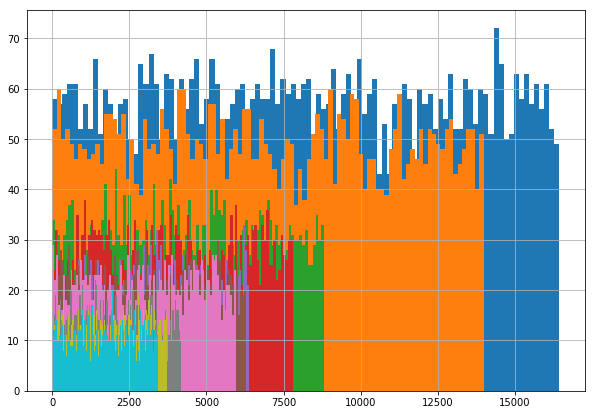

In [94]:
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

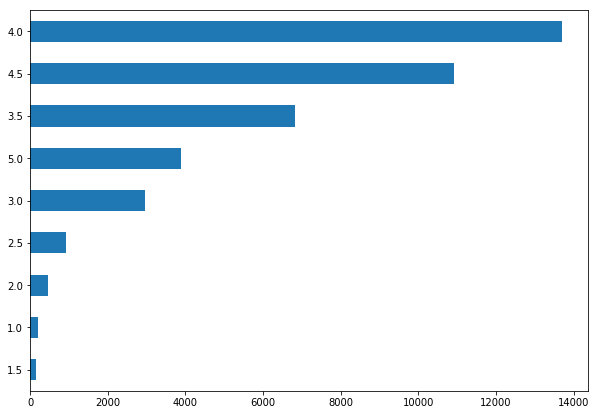

In [98]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

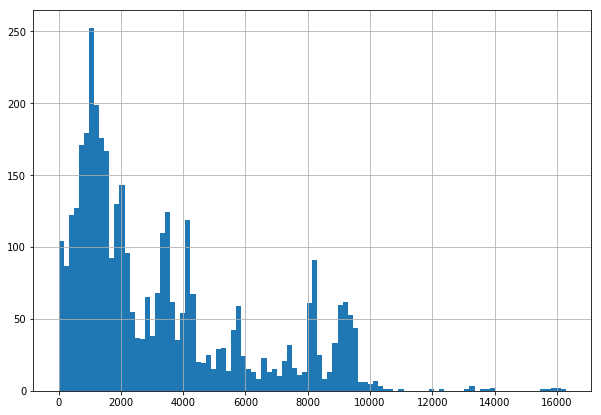

In [99]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

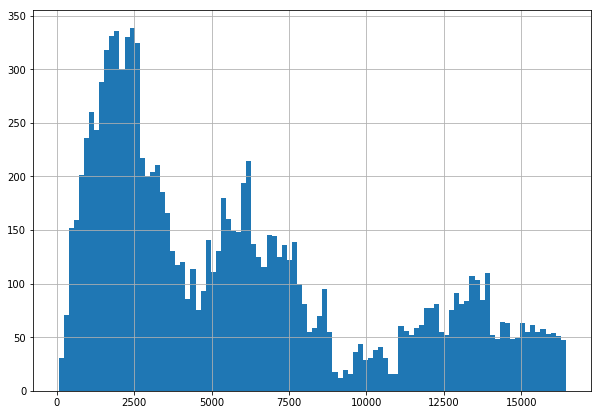

In [100]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

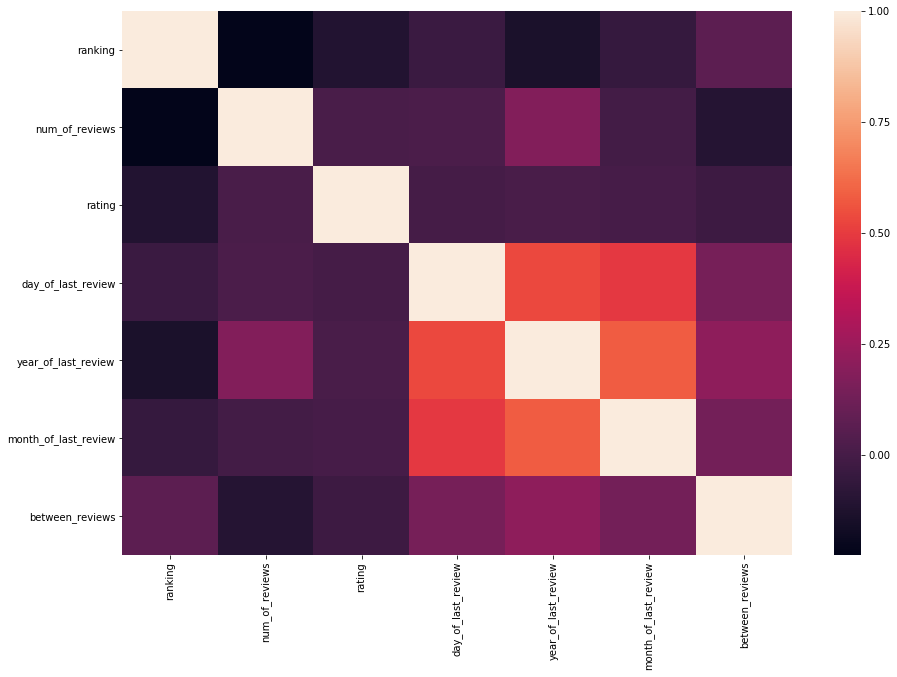

In [101]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

# Data Preprocessing
Creating one big function for all preprocessing

In [149]:
# Reloading data
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')

# Marking sample data
df_train['sample'] = 1
df_test['sample'] = 0
df_test['Rating'] = 0

# Combining two data sets
data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.columns = ['res_id', 'city', 'cuisine_style', 'ranking', 'price_range',
                'num_of_reviews', 'reviews', 'url_ta', 'id_ta', 'sample', 'Rating']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
res_id            50000 non-null object
city              50000 non-null object
cuisine_style     38410 non-null object
ranking           50000 non-null float64
price_range       32639 non-null object
num_of_reviews    46800 non-null float64
reviews           49998 non-null object
url_ta            50000 non-null object
id_ta             50000 non-null object
sample            50000 non-null int64
Rating            50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [150]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    

    
    # ################### 1. Предобработка ############################################################## 
    df_output.drop(['res_id','id_ta'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    
    df_output.num_of_reviews.mode()[0]
    df_output.num_of_reviews.fillna(0, inplace=True)
    
    df_output.cuisine_style = df_output.cuisine_style.fillna("['Unknown']")
    
    df_output['p_range_is_nan'] = pd.isna(df_output['price_range']).astype('uint8')
    df_output['price_range'] = df_output['price_range'].fillna(df_output['price_range'].mode()[0])

    df_output.reviews = df_output.reviews.fillna('[[, ], [, ]]')
    
    # ################### 3. Encoding ############################################################## 
    
    #City  
    df_output = pd.get_dummies(df_output, columns=[ 'city',], dummy_na=True)
    
    #Cuisine Style
    df_output.cuisine_style = df_output.cuisine_style.apply(lambda x: x[1:-1].split(', '))
    cuisine_df = df_output.explode('cuisine_style')
    
    all_styles = cuisine_df.cuisine_style.value_counts().index
    top_styles = list(all_styles)[:30]
    styles_to_throw_away = list(set(all_styles) - set(top_styles))
    cuisine_df.loc[cuisine_df.cuisine_style.isin(styles_to_throw_away), 
             'cuisine_style'] = "'Other'"
    
    s = cuisine_df.cuisine_style
    cuisine_dummies = pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)
    df_output = pd.concat([df_output, cuisine_dummies], axis=1)
    
    #Number of Reviews
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    df_output['num_of_reviews'] = scaler.fit_transform(np.array(df_output['num_of_reviews']).reshape(-1, 1))
    
    #Ranking
    df_output['ranking'] = scaler.fit_transform(np.array(df_output['ranking']).reshape(-1, 1))
    
    
    # ################### 4. Feature Engineering ####################################################
    
    # Reviews
    
    
    def rev_to_date(x):
        y = 0
        rev_date = x.split('], [')
        if (rev_date[1].split(', ')[0].strip("['']") != ''):
            y = pd.to_datetime(rev_date[1].split(', ')[0].strip("['']"), format="%m/%d/%Y")
        return y


    def between_revs(x):
        y_z = datetime.timedelta(days=0)
        rev_date= x.split('], [')
        condition3 = len(rev_date[1].split(', ')) == 2
        if condition3:
            condition1 = rev_date[1].split(', ')[0].strip("['']")
            condition2 = rev_date[1].split(', ')[1].strip("['']")
            if (condition1 != '' and condition2 != '' and condition3): 
                y = pd.to_datetime(condition1, format="%m/%d/%Y")
                z = pd.to_datetime(condition2, format="%m/%d/%Y")
                y_z = y - z
        return abs(y_z).days

    df_output['last_review'] = df_output.reviews.apply(rev_to_date)
    df_output['between_reviews'] = df_output.reviews.apply(between_revs)
    
    df_output['day_of_last_review'] = df_output['last_review'][df_output['last_review'] != 0].apply(lambda x: x.day)
    df_output['year_of_last_review'] = df_output['last_review'][df_output['last_review'] != 0].apply(lambda x: x.year)
    df_output['month_of_last_review'] = df_output['last_review'][df_output['last_review'] != 0].apply(lambda x: x.month)

    df_output['day_of_last_review'] = df_output['day_of_last_review'].fillna(0)
    df_output['month_of_last_review'] = df_output['month_of_last_review'].fillna(0)
    df_output['year_of_last_review'] = df_output['year_of_last_review'].fillna(2000)


    
    
    # ################### 5. Clean #################################################### 

    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

Deploying function

In [151]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,ranking,num_of_reviews,sample,Rating,p_range_is_nan,capital,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,...,'Sushi','Thai','Unknown','Vegan Options','Vegetarian Friendly','Wine Bar',between_reviews,day_of_last_review,year_of_last_review,month_of_last_review
33910,0.262043,0.162473,1,3.5,0,1,0,0,0,0,...,0,0,0,0,1,0,17,7.0,2018.0,1.0
7512,-0.778212,0.445521,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,160,5.0,2017.0,11.0
2392,-0.836319,1.067529,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,17,7.0,2018.0,1.0
30481,0.673388,-0.340724,1,3.5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,2000.0,0.0
14391,-0.593890,0.574815,1,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,35,31.0,2016.0,8.0
33723,0.118261,-0.239386,1,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,474,18.0,2017.0,10.0
44891,-0.940101,0.134518,1,4.5,0,1,0,0,0,0,...,0,0,0,0,1,0,22,7.0,2017.0,12.0
34030,-0.946318,0.316228,1,4.0,0,1,0,0,0,0,...,0,0,0,0,0,0,54,4.0,2017.0,8.0
2336,0.165828,-0.407118,0,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0.0,2000.0,0.0
13374,0.885547,-0.354702,1,4.5,0,1,0,0,0,0,...,0,0,0,0,0,1,71,22.0,2017.0,10.0


In [152]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 73 columns):
ranking                  50000 non-null float64
num_of_reviews           50000 non-null float64
sample                   50000 non-null int64
Rating                   50000 non-null float64
p_range_is_nan           50000 non-null uint8
capital                  50000 non-null int64
city_Amsterdam           50000 non-null uint8
city_Athens              50000 non-null uint8
city_Barcelona           50000 non-null uint8
city_Berlin              50000 non-null uint8
city_Bratislava          50000 non-null uint8
city_Brussels            50000 non-null uint8
city_Budapest            50000 non-null uint8
city_Copenhagen          50000 non-null uint8
city_Dublin              50000 non-null uint8
city_Edinburgh           50000 non-null uint8
city_Geneva              50000 non-null uint8
city_Hamburg             50000 non-null uint8
city_Helsinki            50000 non-null uint8
city_Krakow

In [153]:
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

In [154]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 10000 to 49999
Data columns (total 72 columns):
ranking                  40000 non-null float64
num_of_reviews           40000 non-null float64
Rating                   40000 non-null float64
p_range_is_nan           40000 non-null uint8
capital                  40000 non-null int64
city_Amsterdam           40000 non-null uint8
city_Athens              40000 non-null uint8
city_Barcelona           40000 non-null uint8
city_Berlin              40000 non-null uint8
city_Bratislava          40000 non-null uint8
city_Brussels            40000 non-null uint8
city_Budapest            40000 non-null uint8
city_Copenhagen          40000 non-null uint8
city_Dublin              40000 non-null uint8
city_Edinburgh           40000 non-null uint8
city_Geneva              40000 non-null uint8
city_Hamburg             40000 non-null uint8
city_Helsinki            40000 non-null uint8
city_Krakow              40000 non-null uint8
city_Li

In [155]:
y = train_data.Rating.values            
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [ ]:
RANDOM_SEED = 42

In [156]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [157]:
# Checking
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 72), (40000, 72), (40000, 71), (32000, 71), (8000, 71))

# Model 

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [159]:
# Creating model
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [160]:
# Teaching the model
model.fit(X_train, y_train)

# Deploying
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [161]:
# Comparing predicted and real data
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21074562500000002


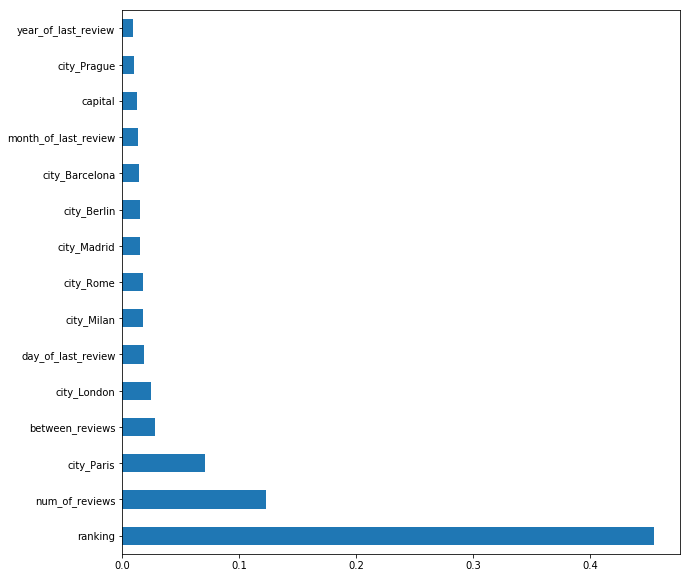

In [162]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission

In [117]:
test_data.sample(10)

,ranking,num_of_reviews,p_range_is_nan,city_Amsterdam,city_Athens,city_Barcelona,city_Berlin,city_Bratislava,city_Brussels,city_Budapest,...,'Sushi','Thai','Unknown','Vegan Options','Vegetarian Friendly','Wine Bar',between_reviews,day_of_last_review,year_of_last_review,month_of_last_review
3635,-0.911994,1.336599,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,19.0,2017.0,12.0
890,-0.490378,1.462399,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,90,7.0,2017.0,8.0
2153,2.194176,-0.379163,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,567,2.0,2017.0,5.0
5863,1.699589,-0.396635,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,82,22.0,2017.0,10.0
3602,-0.349570,-0.344218,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,177,14.0,2017.0,10.0
9518,-0.837130,0.005224,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,9.0,2018.0,1.0
4022,-0.729834,-0.365185,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0.0,2000.0,0.0
199,-0.941993,-0.159014,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,10,10.0,2017.0,12.0
2880,1.416620,0.550354,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,68,2.0,2017.0,10.0
7855,-0.688754,-0.337229,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,165,15.0,2017.0,10.0


In [119]:
test_data.columns

Index(['ranking', 'num_of_reviews', 'p_range_is_nan', 'city_Amsterdam',
       'city_Athens', 'city_Barcelona', 'city_Berlin', 'city_Bratislava',
       'city_Brussels', 'city_Budapest', 'city_Copenhagen', 'city_Dublin',
       'city_Edinburgh', 'city_Geneva', 'city_Hamburg', 'city_Helsinki',
       'city_Krakow', 'city_Lisbon', 'city_Ljubljana', 'city_London',
       'city_Luxembourg', 'city_Lyon', 'city_Madrid', 'city_Milan',
       'city_Munich', 'city_Oporto', 'city_Oslo', 'city_Paris', 'city_Prague',
       'city_Rome', 'city_Stockholm', 'city_Vienna', 'city_Warsaw',
       'city_Zurich', 'city_nan', ''American'', ''Asian'', ''Bar'',
       ''British'', ''Cafe'', ''Central European'', ''Chinese'', ''European'',
       ''Fast Food'', ''French'', ''German'', ''Gluten Free Options'',
       ''Halal'', ''Indian'', ''International'', ''Italian'', ''Japanese'',
       ''Mediterranean'', ''Middle Eastern'', ''Other'', ''Pizza'',
       ''Portuguese'', ''Pub'', ''Seafood'', ''Spanish'', '

In [120]:
sample_submission

,Restaurant_id,Rating
0,id_0,3.000
1,id_1,4.265
2,id_2,4.495
3,id_3,4.385
4,id_4,4.420
...,...,...
9995,id_9995,4.485
9996,id_9996,4.210
9997,id_9997,3.010
9998,id_9998,4.495


In [121]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [122]:
predict_submission

array([3.   , 4.265, 4.495, ..., 3.01 , 4.495, 4.345])

In [124]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.000
1,id_1,4.265
2,id_2,4.495
3,id_3,4.385
4,id_4,4.420
5,id_5,4.415
6,id_6,2.510
7,id_7,2.725
8,id_8,4.195
9,id_9,4.565
